In [1]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/MacBookAir/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Dataset overview

In [20]:
print(aisles.info())
aisles.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [37]:
print(departments.info())
departments.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes
None


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
print(order_products__prior.info())
order_products__prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
print(order_products__train.info())
order_products__train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [24]:
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
print(products.info())
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Order data Analysis

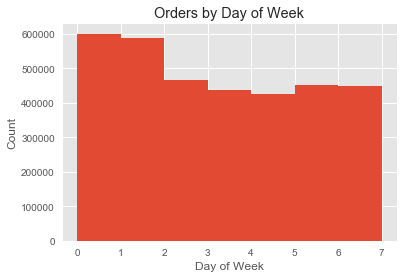

In [26]:
plt.hist('order_dow',data=orders, bins=[0,1,2,3,4,5,6,7])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Orders by Day of Week')

Highest number of oders made happens on day 0 and 1

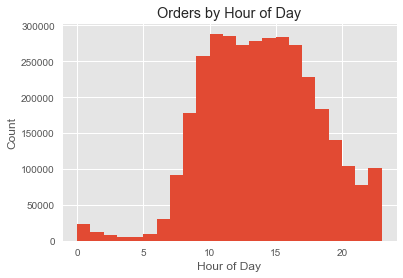

In [27]:
plt.hist('order_hour_of_day',data=orders, bins=np.arange(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Orders by Hour of Day')


The peak hours are between 9AM and 5PM but from this plot we cannot really see clearly the corresponding day and time combination. Use heatmap (below) instead.

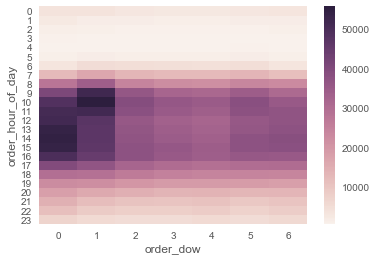

In [28]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped = grouped.pivot('order_hour_of_day', 'order_dow', 'order_number')
sns.heatmap(grouped)

 From the heatmap, the peak day and hours combination occurs on day 0 and day 1 between 9AM and 5PM

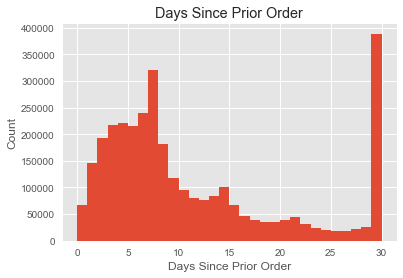

In [29]:
plt.hist('days_since_prior_order',data=orders.dropna(),bins=np.arange(0,31)) #NaNs are dropped
plt.xlabel('Days Since Prior Order')
plt.ylabel('Count')
plt.title('Days Since Prior Order')

A lot of customers put another order after 7 days or 29 days. Why is there a lot of customers that put another order after 29 days?

### Products Analysis 

In [4]:
#merge orders_products__prior with products, aisles, and departments
temp_merged = pd.merge(products,aisles,on='aisle_id')
products_merged = pd.merge(temp_merged,departments,on='department_id')
merged_order_products__prior = pd.merge(order_products__prior, products_merged, on='product_id',how='left')
merged_order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [5]:
#Top 20 products
product_counts = merged_order_products__prior['product_name'].value_counts()
product_counts.head(20)

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

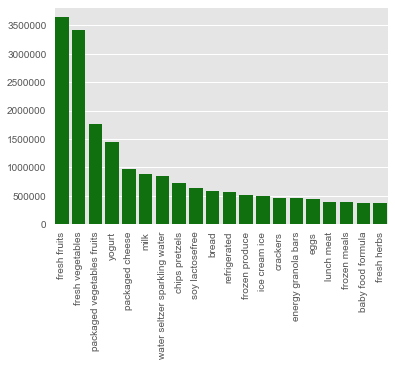

In [45]:
#Top 20 products aisles
aisle_counts = merged_order_products__prior['aisle'].value_counts().head(20)
sns.barplot(aisle_counts.index,aisle_counts.values,color='green')
plt.xticks(rotation=90)

The bar plot of top aisles confirms that the top products and aisles are those of fruits and vegetables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

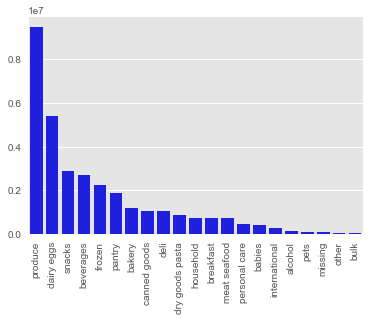

In [46]:
#Top product departments
department_counts = merged_order_products__prior['department'].value_counts()
sns.barplot(department_counts.index,department_counts.values,color='blue')
plt.xticks(rotation=90)

Produce department dominates orders which is consistent with fruits and vegetables as the top products

(array([ 156748.,  186993.,  207027.,  222081.,  228330.,  227675.,
         220006.,  203374.,  184347.,  165550.,  147461.,  131580.,
         116871.,  103683.,   91644.,   81192.,   71360.,   62629.,
          54817.,   48096.,   41863.,   36368.,   31672.,   27065.,
          23613.,   20283.,   17488.,   15102.,   13033.,   11251.,
           9571.,    8035.,    6991.,    6041.,    5164.,    4407.,
           3681.,    3169.,    2653.,    2272.,    1978.,    1642.,
           1412.,    1227.,    1048.,     895.,     743.,    1171.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 48 Patch objects>)

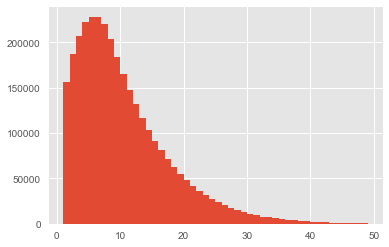

In [47]:
products_in_order = merged_order_products__prior.groupby('order_id')['add_to_cart_order'].max()
plt.hist(products_in_order,bins=np.arange(1,50))

A lot of customers bought 4 to 7 products per order.

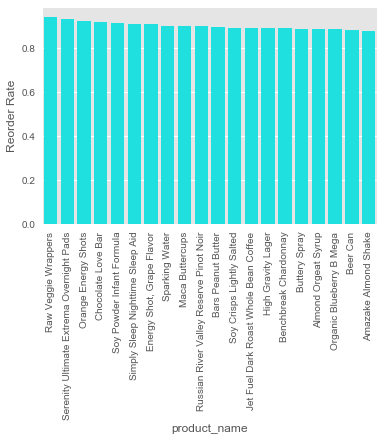

In [35]:
#products with highest reorder rate
products_reorder = merged_order_products__prior.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
products_reorder = products_reorder.head(20)
sns.barplot(products_reorder.index,products_reorder.values,color='aqua')
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Rate')


The barplot above shows various products with the highest reorder rate (>85%).

In [36]:
"""merge the two data tables: orders and prior order to figure out the correlation 
between the number of items per order and how long it takes one to reorder afterwards.
By doing so, we can figure out if people who order more items take longer time to reorder?
"""

#we only want 'prior' order here
orders_and_prior = pd.merge(orders,order_products__prior,how='right',on='order_id')

In [37]:
orders_and_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [38]:
orders_and_prior.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
dtype: int64

In [39]:
k1 = orders_and_prior.groupby('order_id')['add_to_cart_order'].max().reset_index()
k2 = orders_and_prior.groupby('order_id')['days_since_prior_order'].mean().reset_index()
k3 = pd.merge(k1,k2,on='order_id')

In [40]:
k3.dropna().head()

,order_id,add_to_cart_order,days_since_prior_order
0,2,9,8.0
1,3,8,12.0
2,4,13,7.0
3,5,26,9.0
4,6,3,30.0


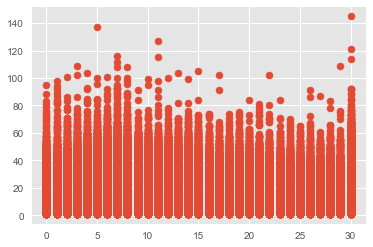

In [41]:
plt.scatter(x='days_since_prior_order',y='add_to_cart_order',data=k3)

In [25]:
"""
Join Department and products table to see what products are under a certain department

"""


products_dept = pd.merge(products,departments,on='department_id', how='right')
products_dept.head()

,product_id,product_name,aisle_id,department_id,orders,total_reorders,reorder_rate,department
0,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,19.0,2.0,0.105263,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,2166.0,1391.0,0.642198,snacks
3,32,Nacho Cheese White Bean Chips,107,19,543.0,367.0,0.675875,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,49.0,32.0,0.653061,snacks


In [26]:
products_dept_aisle = pd.merge(products_dept,aisles, on = 'aisle_id',how='right')
products_dept_aisle.head()

,product_id,product_name,aisle_id,department_id,orders,total_reorders,reorder_rate,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,11.0,3.0,0.272727,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,185.0,35.0,0.189189,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,97.0,71.0,0.731959,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,156.0,56.0,0.358974,snacks,cookies cakes


In [27]:
dept_aisle = pd.DataFrame(products_dept_aisle.groupby(['department','aisle'])['aisle_id'].count())
dept_aisle.columns = ['Number of Products']
dept_aisle.head()

Number of Products
department aisle                                         
alcohol    beers coolers                              385
           red wines                                  232
           specialty wines champagnes                  95
           spirits                                    195
           white wines                                147

In [29]:
orders_products = pd.merge(products_dept,order_products__prior,on='product_id',how='right')
orders_products.head()

,product_id,product_name,aisle_id,department_id,orders,total_reorders,reorder_rate,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391,snacks,9273,30,0


In [30]:
orders_products.reset_index(inplace=True)

In [31]:
orders_products.isnull().sum()

index                0
product_id           0
product_name         0
aisle_id             0
department_id        0
orders               0
total_reorders       0
reorder_rate         0
department           0
order_id             0
add_to_cart_order    0
reordered            0
dtype: int64

In [33]:
orders_per_product = orders_products.groupby('department')['order_id'].count()
No_orders_per_dept = pd.DataFrame(orders_per_product).reset_index()
No_orders_per_dept.head()

,department,order_id
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569


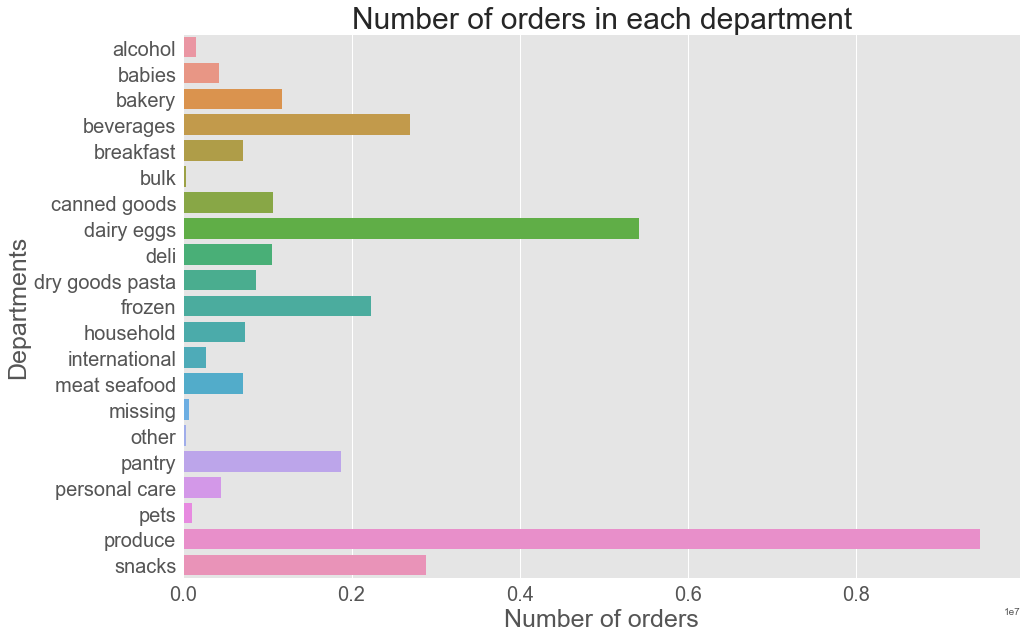

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'order_id',y='department',data=No_orders_per_dept)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylabel('Departments',fontsize= 25)
plt.xlabel('Number of orders',fontsize=25)
plt.title('Number of orders in each department',fontsize=30)

From the graph above, we can see that most people order from the produce department, followed by the dairy eggs department, followed by snacks and beverages.

### User Analysis

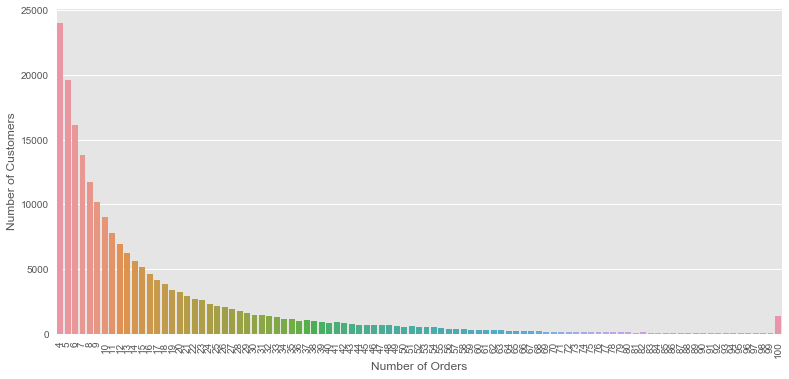

In [42]:
#how many time do each user orders 
prev_orders = orders.groupby('user_id')['order_number'].max().value_counts()
plt.figure(figsize=(13,6))
sns.barplot(prev_orders.index,prev_orders.values)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

From the plot above, we can see that the number of orders per customer was between 4 and 100 and in general, the number of customers is decreasing when the number of orders is increasing.

In [43]:
merged_order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


# Extracting Additional Features

In this part, extract and aggregate data (features) at user level, order level, product level, and user-product level.

In [6]:
merged = pd.merge(orders,merged_order_products__prior,on='order_id',how='right')

In [ ]:
merged.head()

In [7]:
#user level variables
users = pd.DataFrame()
users['average_days_in_between'] = orders.groupby('user_id')['days_since_prior_order'].mean() 
users['number_of_orders_users'] = orders.groupby('user_id').size()
users['total_items'] = merged.groupby('user_id').size()
users['all_products'] = merged.groupby('user_id')['product_id'].apply(set)
users['total_distinct_items'] = users.all_products.map(len)
users['average_basket'] = users.total_items / users.number_of_orders_users
users=users.reset_index()
users=users.set_index('user_id',drop=False)
print(users.shape)
users.head()

(206209, 7)


,user_id,average_days_in_between,number_of_orders_users,total_items,all_products,total_distinct_items,average_basket
user_id,,,,,,,
1,1,19.000000,11,59,"{17122, 196, 26405, 14084, 46149, 26088, 13032...",18,5.363636
2,2,16.285714,15,195,"{45066, 2573, 18961, 1559, 32792, 23, 22559, 1...",102,13.000000
3,3,12.000000,13,88,"{17668, 44683, 48523, 21903, 14992, 21137, 324...",33,6.769231
4,4,17.000000,6,18,"{21573, 17769, 35469, 43704, 37646, 1200, 1186...",17,3.000000
5,5,11.500000,5,37,"{28289, 11777, 40706, 48775, 20754, 6808, 1398...",23,7.400000


In [8]:
#product level variables
products_temp = pd.DataFrame()
products_temp['orders'] = merged.groupby('product_id').size()
products_temp['total_reorders'] = merged['reordered'].groupby(merged.product_id).sum()
products_temp['reorder_rate'] = products_temp['total_reorders'] / products_temp['orders']
products = products.join(products_temp, on='product_id')
products.set_index('product_id', drop=False, inplace=True)
del products_temp
print(products.shape)
products.head()

(49688, 7)


,product_id,product_name,aisle_id,department_id,orders,total_reorders,reorder_rate
product_id,,,,,,,
1,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391
2,2,All-Seasons Salt,104,13,90.0,12.0,0.133333
3,3,Robust Golden Unsweetened Oolong Tea,94,7,277.0,203.0,0.732852
4,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,329.0,147.0,0.446809
5,5,Green Chile Anytime Sauce,5,13,15.0,9.0,0.600000


In [9]:
#user x product level variables
userproduct = merged.copy()
userproduct['user_product_id'] = userproduct.product_id + userproduct.user_id * 100000
userproduct = userproduct.sort_values('order_number')
userproduct = userproduct.groupby('user_product_id',sort=False).agg({'order_id': ['size', 'last'], 'add_to_cart_order': 'sum'})
userproduct.columns = ['number_of_orders_userproduct','last_order_id','sum_pos_in_cart']
userproduct=userproduct.reset_index()
userproduct=userproduct.set_index('user_product_id',drop=False)
print(userproduct.shape)
del merged
userproduct.head()

(13307953, 4)


,user_product_id,number_of_orders_userproduct,last_order_id,sum_pos_in_cart
user_product_id,,,,
100196,100196,10,2550362,14
12430845961,12430845961,3,1385973,19
12430840332,12430840332,1,3215519,11
7707737067,7707737067,1,833332,6
7707708518,7707708518,1,833332,7


In [10]:
#order level variables
orders=orders.set_index('order_id',drop=False)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
2539329,2539329,1,prior,1,2,8,NaN
2398795,2398795,1,prior,2,3,7,15.0
473747,473747,1,prior,3,3,12,21.0
2254736,2254736,1,prior,4,4,7,29.0
431534,431534,1,prior,5,4,15,28.0


## Train-Test Split
Because the data is obtained from kaggle and kaggle does not post any test cases, the data is split for training (80%) and testing (20%) so that I am able to measure the model's performance measure.

In [11]:
order_products__train = pd.read_csv('order_products__train.csv')

from sklearn.cross_validation import train_test_split
big_train_orders = orders[orders.eval_set == 'train']
train_orders,test_orders = train_test_split(big_train_orders,test_size=0.2)
print(train_orders.shape)
print(test_orders.shape)

train_order_id = train_orders['order_id'].tolist()
test_order_id = test_orders['order_id'].tolist()

train=order_products__train[order_products__train['order_id'].isin(train_order_id)]
test=order_products__train[order_products__train['order_id'].isin(test_order_id)]
train.set_index(['order_id', 'product_id'], inplace=True, drop=False)
test.set_index(['order_id', 'product_id'], inplace=True, drop=False)
print(train.shape)
print(test.shape)

(104967, 7)
(26242, 7)
(1108218, 4)
(276399, 4)


## Building Features Dataframe

The function belows help create a single final dataframe that consists of all of the features (user level, order level, product level, user-product level)

In [12]:
def build_features_df(str_train_or_test):
    if str_train_or_test=='train':
        train_or_test = train_orders
    elif str_train_or_test=='test':
        train_or_test = test_orders
    order_list = []
    product_list = []
    labels = []
    for row in train_or_test.itertuples():
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        order_list += [order_id] * len(user_products)
        if str_train_or_test=='train':
            labels += [(order_id, product) in train.index for product in user_products]
        elif str_train_or_test=='test':
            labels += [(order_id, product) in test.index for product in user_products]

    df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    labels = np.array(labels, dtype=np.int8)
    del order_list
    del product_list

    df['user_id'] = df.order_id.map(orders.user_id)
    df['user_total_orders'] = df.user_id.map(users.number_of_orders_users)
    df['user_total_items'] = df.user_id.map(users.total_items)
    df['total_distinct_items'] = df.user_id.map(users.total_distinct_items)
    df['user_average_days_between_orders'] = df.user_id.map(users.average_days_in_between)
    df['user_average_basket'] =  df.user_id.map(users.average_basket)

    df['order_hour_of_day'] = df.order_id.map(orders.order_hour_of_day)
    df['days_since_prior_order'] = df.order_id.map(orders.days_since_prior_order)
    df['days_since_ratio'] = df.days_since_prior_order / df.user_average_days_between_orders

    df['aisle_id'] = df.product_id.map(products.aisle_id)
    df['department_id'] = df.product_id.map(products.department_id)
    df['product_orders'] = df.product_id.map(products.orders).astype(np.int32)
    df['product_reorders'] = df.product_id.map(products.total_reorders)
    df['product_reorder_rate'] = df.product_id.map(products.reorder_rate)

    df['z'] = df.user_id * 100000 + df.product_id
    df['userproduct_orders'] = df.z.map(userproduct.number_of_orders_userproduct)
    df['userproduct_orders_ratio'] = (df.userproduct_orders / df.user_total_orders).astype(np.float32)
    df['userproduct_last_order_id'] = df.z.map(userproduct.last_order_id)
    df['userproduct_average_pos_in_cart'] = (df.z.map(userproduct.sum_pos_in_cart) / df.userproduct_orders).astype(np.float32)
    df['userproduct_reorder_rate'] = (df.userproduct_orders / df.user_total_orders).astype(np.float32)
    df['userproduct_orders_since_last'] = df.user_total_orders - df.userproduct_last_order_id.map(orders.order_number)
    df['userproduct_delta_hour_vs_last'] = abs(df.order_hour_of_day - df.userproduct_last_order_id.map(orders.order_hour_of_day)).map(lambda x: min(x, 24-x)).astype(np.int8)
    df.drop(['userproduct_last_order_id', 'z'], axis=1, inplace=True)
    return (df,labels)

In [ ]:
#build final training dataframe
df_train,y_train = build_features_df('train')

In [ ]:
df_test, y_test = build_features_df('test')

In [ ]:
#deal with Nan on column 'days_since_ratio'
df_train['days_since_ratio'].fillna(-1,inplace=True)
df_test['days_since_ratio'].fillna(-1,inplace=True)

In [35]:
#df_train['y_train']=y_train
#df_test['y_test']=y_test
#df_train.to_csv('df_train.csv',index=False)
#df_test.to_csv('df_test.csv',index=False)

In [79]:
#df_train.isnull().sum()
#df_test.isnull().sum()

In [14]:
df_train=pd.read_csv('df_train.csv')
df_test=pd.read_csv('df_test.csv')

# deal with categorical variables

In [15]:
#train
df_train_pre_dummy=df_train.copy()
df_aisle_id = pd.get_dummies(df_train_pre_dummy['aisle_id'],prefix='aisle_id', prefix_sep='_',drop_first=True)
df_department_id = pd.get_dummies(df_train_pre_dummy['department_id'],prefix='department_id', prefix_sep='_',drop_first=True)
df_train_dummy=df_train_pre_dummy.join(df_department_id)
df_train_dummy=df_train_dummy.join(df_aisle_id)
print(df_train_dummy.shape)

#test
df_test_pre_dummy=df_test.copy()
df_aisle_id = pd.get_dummies(df_test_pre_dummy['aisle_id'],prefix='aisle_id', prefix_sep='_',drop_first=True)
df_department_id = pd.get_dummies(df_test_pre_dummy['department_id'],prefix='department_id', prefix_sep='_',drop_first=True)
df_test_dummy=df_test_pre_dummy.join(df_department_id)
df_test_dummy=df_test_dummy.join(df_aisle_id)
print(df_test_dummy.shape)

(6769139, 176)
(1705522, 176)


# Feature

In [16]:
aisle_id=[]
for i in range(2,135):
    aisle_id.append('aisle_id_'+str(i))
    
department_id=[]
for i in range(2,22):
    department_id.append('department_id_'+str(i))

In [18]:
features = ['user_total_orders',
            'user_total_items', 
            'total_distinct_items',
            'user_average_days_between_orders', 
            'user_average_basket',
            'order_hour_of_day',
            'days_since_prior_order',
            'days_since_ratio',
            #'aisle_id', 
            #'department_id', 
            'product_orders', 
            'product_reorders',
            'product_reorder_rate', 
            'userproduct_orders', 
            'userproduct_orders_ratio',
            'userproduct_average_pos_in_cart',
            'userproduct_reorder_rate', 
            'userproduct_orders_since_last',
            'userproduct_delta_hour_vs_last']+aisle_id+department_id



#features = [,'total_order_per_product']



X_train=df_train_dummy[features]
X_test=df_test_dummy[features]

y_train=df_train['y_train']
y_test=df_test['y_test']
# in the algo, change X_test['y_test'] to y_test X_train['y_train'] to y_train

In [7]:
#run this for smaller df
X_train=X_train[0:1000]
y_train=y_train[0:1000]
X_test=X_test[0:1000]
y_test=y_test[0:1000]

# Features Selection

In [7]:
#input to logistic regression from training data
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

In [8]:
#Select K best features:
select = SelectKBest()
selector = select.fit(X_train,y_train)
X_train_new = selector.transform(X_train)
features_score = selector.scores_
features_score = pd.DataFrame(features_score)
features_score.columns=['score']

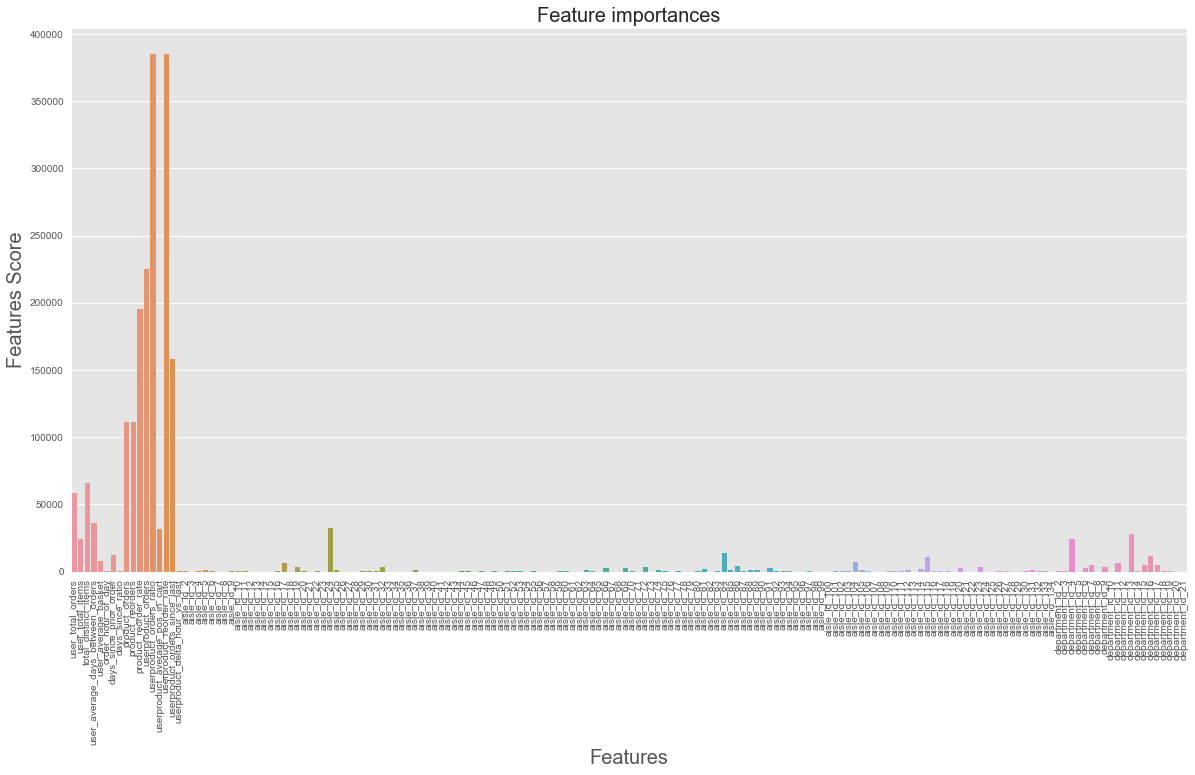

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(x=X_train.columns,y=features_score['score'])
plt.xticks(rotation='vertical')
plt.ylabel('Features Score',size=20)
plt.xlabel('Features',size=20)
plt.title('Feature importances',size=20)

In [10]:
features_score['feature'] = X_train.columns
features_score.sort_values('score',ascending=False).reset_index(drop=True).head(25)

,score,feature
0,385121.551038,userproduct_orders_ratio
1,385121.551038,userproduct_reorder_rate
2,225419.467630,userproduct_orders
3,195433.392681,product_reorder_rate
4,158068.480064,userproduct_orders_since_last
5,111316.593548,product_orders
6,111187.823365,product_reorders
7,65894.568593,total_distinct_items
8,58191.107912,user_total_orders
9,36009.377121,user_average_days_between_orders


In [11]:
less_features = [x for x in features_score.itertuples() if x.score > 7000]
len(less_features)

21

In [12]:
less_features = pd.DataFrame(less_features)
#less_features.sort_values('score',ascending=False).reset_index(drop=True).drop('Index', axis=1)

In [13]:
less_features_list = list(set(less_features.feature))

In [14]:
X_train_features = X_train[less_features_list]
X_test_features = X_test[less_features_list]

# Dummy Classifier

accuracy score: 0.90267085385
Confusion Matrix: 
[[1539525       0]
 [ 165997       0]]
F1 Score:


/Users/MacBookAir/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0


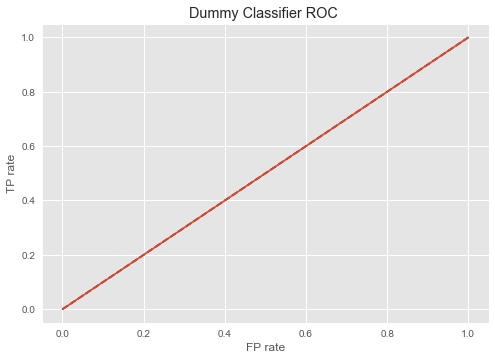

0.5

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

dummy_classifier = DummyClassifier(strategy="most_frequent",
                                  random_state=100)
dummy_classifier.fit(X_train,y_train) #fit x train and y train

#predict the y from the dummy model:
y_dummy_predicted = dummy_classifier.predict(X_test)

#Get the Accuracy Score for actual and predicted for the cross validated dataset
print('accuracy score:',accuracy_score(y_test,y_dummy_predicted)) 
#Get the Confusion Matrix:
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_dummy_predicted))
print('F1 Score:')
print(f1_score(y_test,y_dummy_predicted))

y_pred_dummy_proba = dummy_classifier.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_dummy_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Dummy Classifier')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Dummy Classifier ROC ')
plt.show()

roc_auc_score(y_test,y_pred_dummy_proba)

The Dummy Classifier accuracy rate is 90% and the roc auc score is 0.5, which means that the minimum acceptable roc auc score is 0.5.


The accuracy rate of 87% here does not mean anything except that 90% of the labels are 0 instead of 1.
The F-1 Score is 0 since most of the values here are 0 instead of 1, which means that the precision is 0, which results in an F-1 score of 0.


For our upcoming models, we expect our models to have a higher F-1 and roc auc score in comparison to the dummy classifier.

# Logistic Regression and CV

In [15]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5,8,15)
paramgrid = {'C':c_space}

In [16]:
#check accuracy for model using features that have been deemed to be best:
mdl2 = LogisticRegression()
mdl_features = GridSearchCV(mdl2,paramgrid,cv=3)
mdl_features.fit(X_train_features,y_train)
print('The best parameters for the model is:',mdl_features.best_params_)
print('The best score for the model is:',mdl_features.best_score_)

The best parameters for the model is: {'C': 100000000.0}
The best score for the model is: 0.90193642057


In [17]:
mdl2_final = LogisticRegression(C=mdl_features.best_params_['C'])
mdl2_final.fit(X_train_features,y_train)

#get the predicted probabilities of each user product:
predicted_proba_features = mdl2_final.predict_proba(X_test_features)[:,1]
predicted_proba_features_df = pd.DataFrame(predicted_proba_features)
predicted_proba_features_df['actual'] = y_test
predicted_proba_features_df.columns = ['predicted_proba','actual']

In [18]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import average_precision_score
TRESHOLD = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4]

for tre in TRESHOLD:
    predicted_proba_features_df['predicted_1_or_0']= predicted_proba_features_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0),
         '| f1_score:',f1_score(predicted_proba_features_df.actual, predicted_proba_features_df.predicted_1_or_0))

treshold: 0.1 | auc: 0.66277113368 | accuracy: 0.637402507854 | f1_score: 0.271516953465
treshold: 0.12 | auc: 0.66173434977 | accuracy: 0.705688932772 | f1_score: 0.286516774078
treshold: 0.14 | auc: 0.655754219186 | accuracy: 0.756667460168 | f1_score: 0.297921724199
treshold: 0.16 | auc: 0.645520793695 | accuracy: 0.79348082288 | f1_score: 0.303269592532
treshold: 0.18 | auc: 0.634958384893 | accuracy: 0.820948073376 | f1_score: 0.305182852605
treshold: 0.2 | auc: 0.622828990595 | accuracy: 0.841428606608 | f1_score: 0.301363705642
treshold: 0.22 | auc: 0.610920767014 | accuracy: 0.857093019029 | f1_score: 0.293678692211
treshold: 0.24 | auc: 0.599390757663 | accuracy: 0.869010777932 | f1_score: 0.282235237798
treshold: 0.26 | auc: 0.588679536366 | accuracy: 0.877967566528 | f1_score: 0.267953051412
treshold: 0.28 | auc: 0.57887508872 | accuracy: 0.884636492523 | f1_score: 0.251571944266
treshold: 0.3 | auc: 0.569900045819 | accuracy: 0.889518282379 | f1_score: 0.233632810435
tresho

In [19]:
#CREATE CONFUSION MATRIX:
best_threshold = 0.22
predicted_proba_features_df['predicted_1_or_0']=predicted_proba_features_df['predicted_proba'].apply(lambda x: x>best_threshold).astype(np.int8)
confusion_matrix(predicted_proba_features_df.actual,predicted_proba_features_df.predicted_1_or_0)

array([[1411121,  128404],
       [ 115327,   50670]])

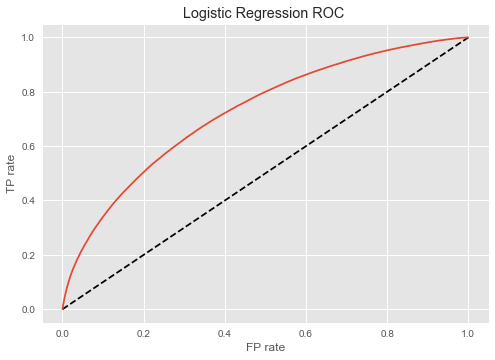

roc auc score for cross validated: 0.610920767014


In [24]:
#Plot the ROC Curve for the Logistic Regression:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,predicted_proba_features_df['predicted_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Logistic Regression ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(y_test,predicted_proba_features_df['predicted_1_or_0']))

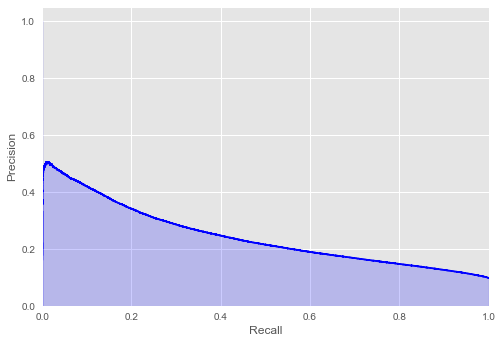

 Precision-Recall: 0.243419268855


In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(predicted_proba_features_df['actual'], predicted_proba_features)

plt.step(recall, precision, color='b', alpha=1, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
print(' Precision-Recall:',average_precision_score(predicted_proba_features_df['actual'], predicted_proba_features_df['predicted_proba']))

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint 

param_dist = {"max_depth": [5, None],
              "max_features": (6,8,10,12),
              "min_samples_leaf": (1,3,5),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_dist,cv=3)
tree_cv.fit(X_train_features,y_train)
print('The best parameters for the model is:',tree_cv.best_params_)
print('The best model score is:',tree_cv.best_score_)

The best parameters for the model is: {'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 5, 'criterion': 'gini'}
The best model score is: 0.9028072846487567


In [16]:
#Fit the Decision Tree model using the best parameters:
tree_new = DecisionTreeClassifier(criterion=tree_cv.best_params_['criterion'],
                                 max_depth = tree_cv.best_params_['max_depth'],
                                  max_features = tree_cv.best_params_['max_features'],
                                  min_samples_leaf = tree_cv.best_params_['min_samples_leaf'])
tree_new.fit(X_train_features,y_train)
predict_proba_tree = tree_new.predict_proba(X_test_features)[:,1]
predict_proba_tree_df = pd.DataFrame(predict_proba_tree)
predict_proba_tree_df['actual'] = y_test
predict_proba_tree_df.columns = ['predicted_proba','actual']

In [19]:
TRES = [0.1,0.12,0.14,0.16,0.18,0.2,0.21,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.6,0.7]
for tre in TRES:
    predict_proba_tree_df['predicted_1_or_0']= predict_proba_tree_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    print('treshold:',tre,'| auc:',roc_auc_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0),
         '| f1_score:',f1_score(predict_proba_tree_df.actual, predict_proba_tree_df.predicted_1_or_0))

treshold: 0.1 | auc: 0.691412277889 | accuracy: 0.67638881234 | f1_score: 0.299287513458
treshold: 0.12 | auc: 0.683937280843 | accuracy: 0.751449116458 | f1_score: 0.319722181657
treshold: 0.14 | auc: 0.657769004727 | accuracy: 0.836139316878 | f1_score: 0.341362016629
treshold: 0.16 | auc: 0.6553106882 | accuracy: 0.842437681836 | f1_score: 0.343199460337
treshold: 0.18 | auc: 0.6553106882 | accuracy: 0.842437681836 | f1_score: 0.343199460337
treshold: 0.2 | auc: 0.6553106882 | accuracy: 0.842437681836 | f1_score: 0.343199460337
treshold: 0.21 | auc: 0.6553106882 | accuracy: 0.842437681836 | f1_score: 0.343199460337
treshold: 0.22 | auc: 0.642817699833 | accuracy: 0.852529606771 | f1_score: 0.335452369251
treshold: 0.24 | auc: 0.597825571264 | accuracy: 0.884523917018 | f1_score: 0.289597558732
treshold: 0.26 | auc: 0.597825571264 | accuracy: 0.884523917018 | f1_score: 0.289597558732
treshold: 0.28 | auc: 0.597825571264 | accuracy: 0.884523917018 | f1_score: 0.289597558732
treshold: 

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
best_thre = 0.21
predict_proba_tree_df['predicted_1_or_0'] = predict_proba_tree_df['predicted_proba'].apply(lambda x: x>best_thre).astype(np.int8)
confusion_matrix(predict_proba_tree_df.actual,predict_proba_tree_df.predicted_1_or_0)

array([[1366587,  172938],
       [  95788,   70209]])

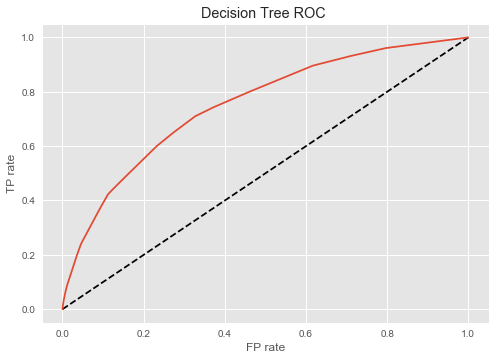

roc auc score for cross validated: 0.6553106882


In [22]:
#Plot the ROC Curve for the Decision Tree:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,predict_proba_tree_df['predicted_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Decision Tree ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(y_test,predict_proba_tree_df['predicted_1_or_0']))

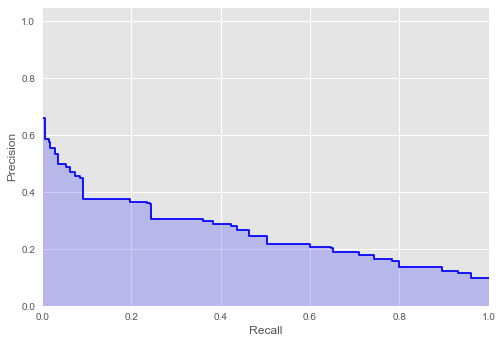

Precision-Recall: 0.260748760724


In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(predict_proba_tree_df['actual'], predict_proba_tree)

plt.step(recall, precision, color='b', alpha=1, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print('Precision-Recall:',average_precision_score(predict_proba_tree_df['actual'], predict_proba_tree))

# Light Gradient Boosting

In [4]:
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from sklearn.grid_search import GridSearchCV

In [31]:
# to reduce the size of the dataset for testing around
train_df=df_train[0:1000]
labels=df_train.y_train[0:1000]

df_test=df_test[0:1000]
labels_test=df_test.y_test[0:1000]


In [70]:
features = ['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'userproduct_orders', 'userproduct_orders_ratio',
       'userproduct_average_pos_in_cart', 'userproduct_reorder_rate', 'userproduct_orders_since_last',
       'userproduct_delta_hour_vs_last'] 

#reformat train dataset
lgb_train_df = lgb.Dataset(df_train[features],
                      label=df_train.y_train,
                      categorical_feature=['aisle_id','department_id'])

#LGB classifier (binary) with standard parameters
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary',num_leaves=80)
_ = mdl.fit(df_train[features], df_train.y_train)

In [71]:
_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=80, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

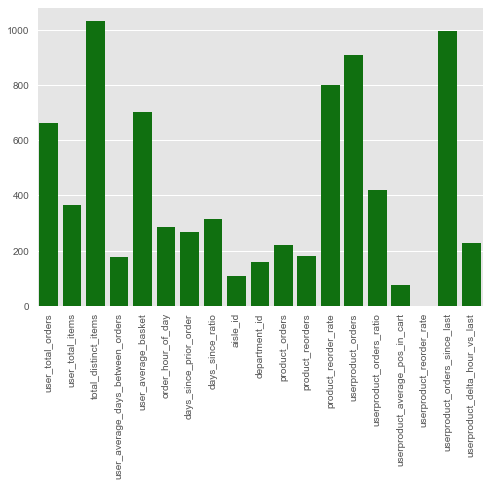

In [72]:
sns.barplot(features,mdl.feature_importances_,color='green')
plt.xticks(rotation='vertical')

In [49]:
# pick > 100 
features = ['user_total_orders',
            'user_total_items', 
            'total_distinct_items',
            'user_average_basket',
       'order_hour_of_day',
            'days_since_prior_order',
            'days_since_ratio',
       'product_reorder_rate',
            'userproduct_orders',
            'userproduct_orders_ratio',
            'userproduct_orders_since_last',
       'userproduct_delta_hour_vs_last'] 

In [ ]:
gridParams = {'learning_rate': [0.05,0.1,0.2],'num_leaves': [60,70,80],'max_depth':[2,5,8]}

#Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary')

#Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=1, cv=3, n_jobs=-1)

#Run the grid
grid.fit(df_train[features], df_train.y_train)

#best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [50]:
final_mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary',
        learning_rate = grid.best_params_['learning_rate'],
        num_leaves = grid.best_params_['num_leaves'],
        max_depth = grid.best_params_['max_depth'])
final_mdl.fit(df_train[features], df_train.y_train)

#predict probability

predict_proba_lgb = final_mdl.predict_proba(df_test[features])[:,1]
predict_proba_lgb_df = pd.DataFrame(predict_proba_lgb)
predict_proba_lgb_df['actual'] = df_test.y_test
predict_proba_lgb_df.columns = ['predicted_proba','actual']


In [51]:
TRESHOLD_rfc = [0.1,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4]
for tre in TRESHOLD_rfc:
    predict_proba_lgb_df['predicted_1_or_0']=predict_proba_lgb_df['predicted_proba'].apply(lambda x: x>tre).astype(np.int8)
    
    print('treshold:',tre,'| auc:',roc_auc_score(predict_proba_lgb_df.actual, predict_proba_lgb_df.predicted_1_or_0),
          '| accuracy:',accuracy_score(predict_proba_lgb_df.actual, predict_proba_lgb_df.predicted_1_or_0),
         '| f1_score:',f1_score(predict_proba_lgb_df.actual, predict_proba_lgb_df.predicted_1_or_0))
    

treshold: 0.1 | auc: 0.717254814226 | accuracy: 0.735570106982 | f1_score: 0.338300822372
treshold: 0.14 | auc: 0.705594831521 | accuracy: 0.810284475955 | f1_score: 0.371305327789
treshold: 0.16 | auc: 0.695761904556 | accuracy: 0.832737425844 | f1_score: 0.379567282597
treshold: 0.18 | auc: 0.684835389482 | accuracy: 0.849383355946 | f1_score: 0.383105031604
treshold: 0.2 | auc: 0.674112826273 | accuracy: 0.862278528216 | f1_score: 0.383691183069
treshold: 0.22 | auc: 0.663347042972 | accuracy: 0.872179895657 | f1_score: 0.380924523908
treshold: 0.24 | auc: 0.65229468183 | accuracy: 0.879802781788 | f1_score: 0.374562573032
treshold: 0.26 | auc: 0.641279435236 | accuracy: 0.885649085734 | f1_score: 0.365122562583
treshold: 0.28 | auc: 0.630850259751 | accuracy: 0.890210152669 | f1_score: 0.353799060631
treshold: 0.3 | auc: 0.620743665998 | accuracy: 0.893864165927 | f1_score: 0.34057899741
treshold: 0.32 | auc: 0.610990877775 | accuracy: 0.896788783727 | f1_score: 0.325706646441
tres

In [52]:
best_thre = 0.2
predict_proba_lgb_df['predicted_1_or_0'] = predict_proba_lgb_df['predicted_proba'].apply(lambda x: x>best_thre).astype(np.int8)
confusion_matrix(predict_proba_lgb_df.actual,predict_proba_lgb_df.predicted_1_or_0)

array([[1397519,  142006],
       [  92881,   73116]])

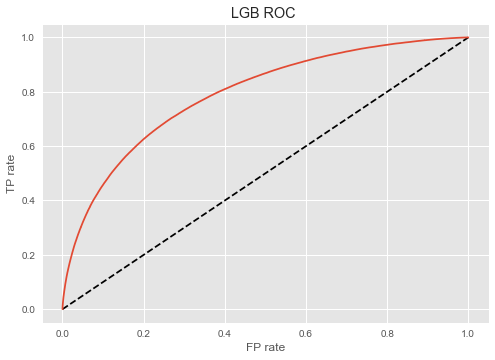

roc auc score for cross validated: 0.674112826273


In [53]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(df_test.y_test,predict_proba_lgb_df['predicted_proba'])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LGB')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('LGB ROC ')
plt.show()
print('roc auc score for cross validated:',roc_auc_score(predict_proba_lgb_df.actual, predict_proba_lgb_df.predicted_1_or_0))

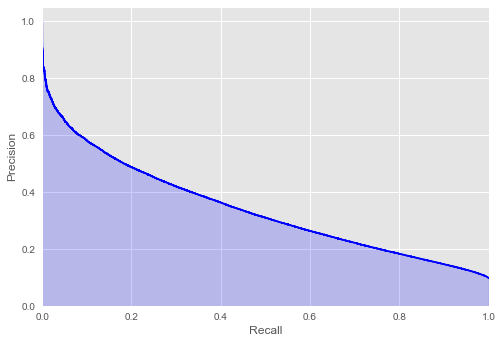

Precision-Recall: 0.339682826647


In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(predict_proba_lgb_df['actual'], predict_proba_lgb)

plt.step(recall, precision, color='b', alpha=1, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print('Precision-Recall:',average_precision_score(predict_proba_lgb_df['actual'], predict_proba_lgb))

# Conclusion

In [23]:
d = {'Method' : ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Light Gradient Boosting' ],
     'ROC' : [0.5, 0.61, 0.655, 0.674]}
Summary=pd.DataFrame(d)

In [24]:
Summary

,Method,ROC
0,Dummy Classifier,0.500
1,Logistic Regression,0.610
2,Decision Tree,0.655
3,Light Gradient Boosting,0.674


### Important Features for LGB: 
- 'user_total_orders'
- 'user_total_items'
- 'userproduct_orders'
- 'userproduct_orders_ratio'
- 'user_average_basket'
- 'total_distinct_items'
- 'order_hour_of_day'
- 'days_since_prior_order'
- 'days_since_ratio'
- 'product_reorder_rate'
- 'userproduct_orders_since_last'
- 'userproduct_delta_hour_vs_last'

# Model Discussion
- Dummy Classifier: The Dummy Classifier indicates an F-1 score of 0, which means that it is the worst possible model for test accuracy. Which is as expected. The ROC Curve also lies on the 45-degree angle, which means that our baseline is 0.5.
- Logistic Regression: The Logistic Regression indicates an F-1 score of 0.3 and an AUC of 0.61, meaning that the Logistic Regression is a better model in comparison to the dummy classifier model.
- Decision Tree: The Decision Tree indicates an F-1 score of 0.34 and an AUC of 0.65. This means that this model is an even better performer in predicting the test samples in comparison to the Logistic Regression.
- LGB: The Random Forest indicates an F-1 score of 0.38 and an AUC score of 0.67. This means that this model is an even better performer in predicting the test samples in comparison to the Logistic Regression and Decision Tree.

** Overall, the best model is the LGB boost since it produces significantly better result than logistic regression and much faster that decision tree **

## added features

- order days of the week  

- total_distinct_items **

- average_basket: total_items/ number_of_orders_users **

- User product orders since last: how many days it has been since the specific user order a specific product?  **

- User product delta hour vs last: Assuming that one orders a product at say 9am previously, and this time at 11am, the user product delta hour vs last would be 2. **